 # **Máster in Data Science - Machine Learning**

Authors: Frida Ibarra y Gema Romero

#### **Notebook 5 (Model Implementation)** 

In this Notebook, a comprehensive evaluation of the previously imported predictive model is conducted. Initially, the performance of the baseline model is analyzed using a predetermined threshold of 0.5, presenting the corresponding confusion matrix and key initial metrics such as accuracy, precision, recall, F1-score, G-Mean, and AUC. This analysis provides an overview of the initial performance and establishes a baseline for future comparisons.

Subsequently, the focus shifts to optimizing the threshold, aiming to identify an optimal value that maximizes the detection of the minority class. To achieve this, relevant curves such as the ROC curve, Precision-Recall curve, Cumulative Gain curve, Lift curve, and Normalized Lift curve are explored and visualized. These analyses enable an understanding of the model's behavior under different thresholds and guide the selection of the most suitable one.

With the optimal threshold identified, a new normalized confusion matrix is generated, reflecting the impact of this adjustment on case classification. The potential presence of overfitting is also verified to ensure the model's generalization capability.

Finally, the analysis is complemented by evaluating a cost matrix for the thresholds of 0.5 and the optimal threshold. This cost matrix quantifies the economic impact of false positives and false negatives, providing a practical perspective aligned with business objectives. The combination of these analyses delivers a thorough evaluation and supports informed decision-making for optimizing the predictive model.

In [41]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import warnings
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from functools import partial
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.metrics import make_scorer, fbeta_score, classification_report
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
import os
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc as roc_auc_metric  # Renombramos la función auc al importarla
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Insert functions

In [42]:
sys.path.append('../src') 
import functions_src as fa  
sys.path.remove('../src')

#Seed
seed = 25

#### Dataset

In [43]:
#Paths
path_df_train = '../data/Processing_data/df_loans_train_resampled.csv'
path_df_test = '../data/Processing_data/df_loans_test_cut.csv'

#data 
df_loans_train = pd.read_csv(path_df_train)
df_loans_test = pd.read_csv(path_df_test)
df_loans_test.head()

#model
xgb_random=load('../models/best_estimator.joblib')

In [44]:
# Drop the first columns as it is duplicated
df_loans_test = df_loans_test.drop('Unnamed: 0',axis=1)

#### **Separate train and test**

In [45]:
#train 
X_train = df_loans_train.drop('TARGET', axis=1)
y_train = df_loans_train['TARGET']

#test
X_test=df_loans_test.drop("TARGET", axis=1)
y_test=df_loans_test["TARGET"]

#Verify dimensions
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((271377, 108), (271377,), (61503, 108), (61503,))

### **Initial Evaluation of the Base Model**

Confusion matrix with the default threshold. This allows you to observe how the baseline model is structured.  
Additionally, basic metrics will be presented to provide a quick general evaluation of the initial performance. Make sure to include the Balanced Accuracy to highlight the class imbalance.

**Initial Model Evaluation with Default Threshold**

In [46]:
# 1. Predict the probabilities of the positive class (default)
y_probs = xgb_random.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (default)

# 2. Apply the threshold of 0.5 to obtain class predictions
y_pred_default = (y_probs >= 0.5).astype(int)

# 3. Confusion Matrix - as a vector
conf_matrix = confusion_matrix(y_test, y_pred_default)

# 4. Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20711 35827]
 [  564  4401]]


**Visualization of Confusion Matrix and Initial Metrics Evaluation**

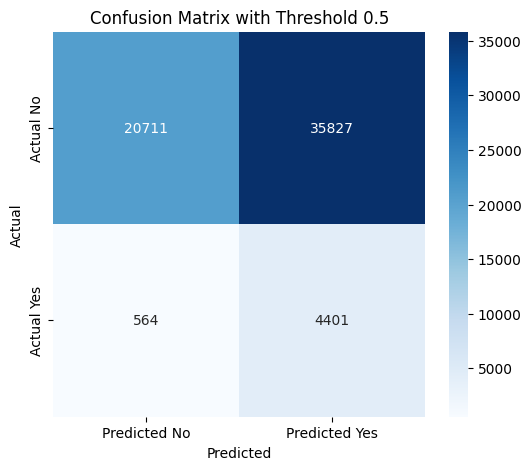

Accuracy: 0.4083
Precision: 0.1094
Recall: 0.8864
F1 Score: 0.1948
G-Mean: 0.5698
AUC: 0.7153
Balanced Accuracy: 0.6264


In [47]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Predicted No", "Predicted Yes"], 
            yticklabels=["Actual No", "Actual Yes"])
plt.title('Confusion Matrix with Threshold 0.5')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Initial Metrics
accuracy = accuracy_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
gmean = geometric_mean_score(y_test, y_pred_default)
auc = roc_auc_score(y_test, y_probs)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_default)

# Display the initial metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")

The 0.5 threshold is not suitable due to class imbalance, as it prioritizes the majority class (non-defaults) and generates many false positives. Although the recall is high (89.14%), indicating that most defaults are detected, the precision is low (10.99%), highlighting that many positive predictions are incorrect. The accuracy (40.86%) is low, reflecting the imbalance, while the F1 score (19.57%) reveals poor balance between precision and recall. The G-Mean (57.14%) suggests moderate ability to balance both classes, and the AUC (71.69%) is acceptable. The Balanced Accuracy (62.88%) shows some progress, but adjusting the threshold could improve precision and reduce false positives.

### **ROC Curve**

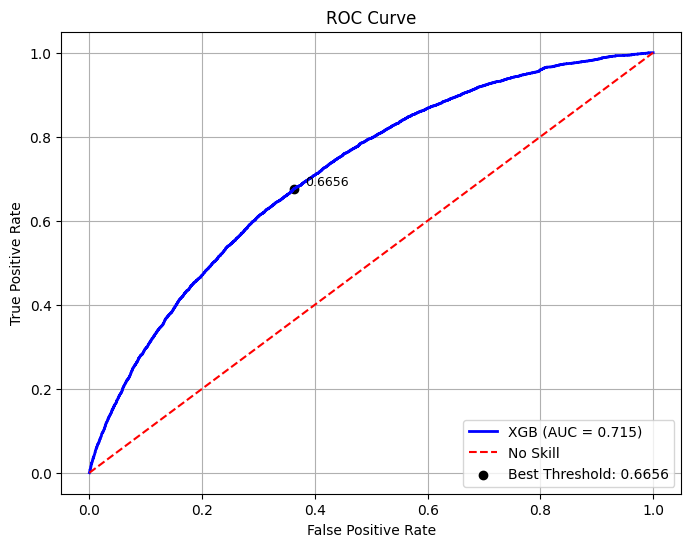

Gini Coefficient: 0.4307


In [48]:
# 4. Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 5. Calculate the area under the curve (AUC)
roc_auc_value = roc_auc_metric(fpr, tpr)  # Use the renamed function

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGB (AUC = {roc_auc_value:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')  # Diagonal line (random model)

# 7. Best point (optimal cut-off)
optimal_idx = np.argmax(tpr - fpr)  # Find the optimal point (maximum difference between TPR and FPR)
optimal_threshold = thresholds[optimal_idx]  # Extract the optimal threshold

# Add both the best point and the optimal threshold to the plot
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='black', label=f'Best Threshold: {optimal_threshold:.4f}')
plt.text(fpr[optimal_idx] + 0.02, tpr[optimal_idx], f'{optimal_threshold:.4f}', fontsize=9, verticalalignment='bottom')

# 8. Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)  # Add grid for easier reading

plt.show()

# Calculate the Gini coefficient
gini = 2 * roc_auc_value - 1
print(f"Gini Coefficient: {gini:.4f}")

**Optimal Point Analysis on the ROC Curve**

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Point with the best difference between TPR and FPR
best_fpr = fpr[np.argmax(tpr - fpr)]
best_tpr = tpr[np.argmax(tpr - fpr)]

print(f"False Positive Rate (FPR): {best_fpr}")
print(f"True Positive Rate (TPR): {best_tpr}")

False Positive Rate (FPR): 0.3628886766422583
True Positive Rate (TPR): 0.6761329305135951


**Results**

With an AUC of 0.717, the model has a moderate ability to distinguish between defaults and non-defaults, indicating acceptable but not perfect performance. In the context of reducing risk in loan origination, the model can correctly predict defaults in 71.7% of cases. This is useful but still leaves room for improvement to avoid granting loans to clients with a high probability of default.

The AUC suggests that, although the model is reasonably good, it is not optimal. Performance could be improved by adjusting the classification threshold, testing other models, or using class-balancing techniques. While the AUC is above 0.7, the ability to accurately identify defaults remains improvable.

Regarding false positive and true positive rates, the false positive rate (FPR) is 0.3622, meaning that around 36.22% of correct payments are incorrectly classified as defaults. Meanwhile, the true positive rate (TPR) is 0.6793, indicating that the model correctly identifies 67.93% of defaults.

This balance between FPR and TPR suggests that the model is moderately well-tuned but also highlights that there is room for improvement in identifying defaults without excessively increasing the number of false positives.

The Gini coefficient of 0.4337 reflects a moderate ability of your model to discriminate between the "default" and "non-default" classes. Although it is not an exceptionally high value, it indicates that the model is partially separating these classes. In the context of your business goal—reducing risk by prioritizing default detection—this moderate capability can be valuable, as it shows that the model has some power to correctly identify defaults.

An optimal threshold of 0.6680 represents a conservative approach to classifying defaults, prioritizing precision by reducing false positives. This ensures that when a default is predicted, it is more likely to be correct, even though some actual defaults (false negatives) may be missed. This approach is suitable when the goal is to minimize financial risk, even at the cost of accepting fewer clients, prioritizing quality over quantity in the loan portfolio.

### **Precision - Recall Curve**

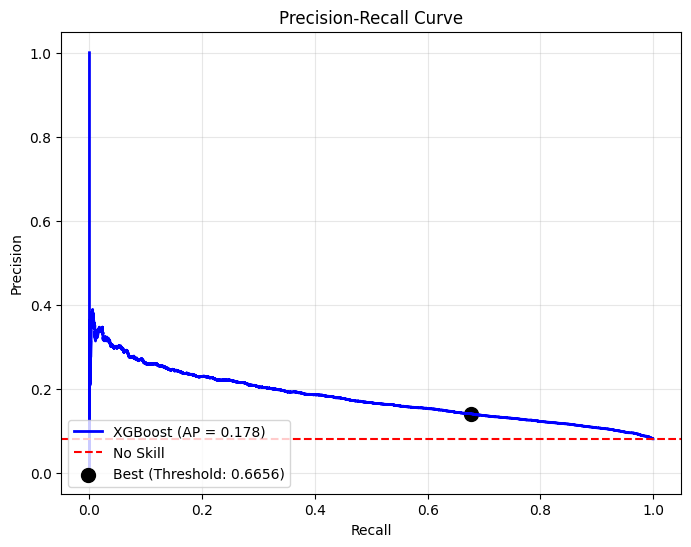

F2 Score at Best Threshold: 0.3838


In [50]:
# 1. Calculate the Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 2. Calculate the Area Under the Precision-Recall Curve (Average Precision)
average_precision = average_precision_score(y_test, y_probs)

# 3. Calculate the Best Point Based on F2-Score
f2score = (5 * precision * recall) / (4 * precision + recall + 1e-10)  # F2 Score Formula
best_index = np.argmax(f2score)  # Index of the Best Point Based on F2-Score
best_recall = recall[best_index]
best_precision = precision[best_index]
best_threshold = thresholds[best_index]  # Threshold corresponding to the Best Point

# 4. Plot the Graph
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'XGBoost (AP = {average_precision:.3f})')  # Updated to XGBoost
plt.axhline(y=np.mean(y_test), color='red', linestyle='--', label='No Skill')  # Baseline (No Skill)
plt.scatter(best_recall, best_precision, color='black', s=100, label=f'Best (Threshold: {best_threshold:.4f})')  # Best Point

# Configure the Plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()

# Print the F2 Score at the Best Threshold
print(f"F2 Score at Best Threshold: {f2score[best_index]:.4f}")


The Precision-Recall graph shows the performance of the XGBoost model compared to a baseline with no skill ("No Skill"). The average area under the curve (AP = 0.180) reflects limited performance on imbalanced data. The identified best threshold (0.6354) balances precision and recall, achieving an F2 Score of 0.3867, which emphasizes recall over precision. This value indicates an approach that prioritizes detecting defaults, even at the cost of sacrificing precision. However, the overall low precision suggests that the model still predicts too many false positives.

### **Cumulative Gain Curve y Lift Curve**

#### **1- Cumulative Gain Curve**

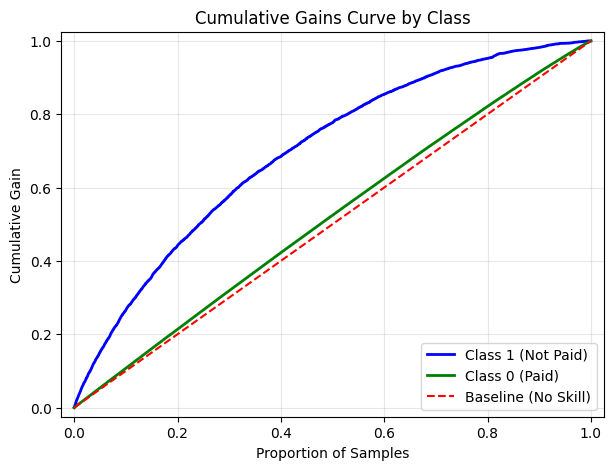

In [51]:
# 1. Create the Cumulative Gains Plot
fig, ax = plt.subplots(figsize=(7, 5))

# 1. Obtain probabilities for both classes
y_pred_proba = xgb_random.predict_proba(X_test)  # Probabilities for both classes
y_pred_proba_class_1 = y_pred_proba[:, 1]  # Probabilities for Class 1 (Not Paid)
y_pred_proba_class_0 = y_pred_proba[:, 0]  # Probabilities for Class 0 (Paid)

# Calculate cumulative gains for Class 1 (Not Paid)
sorted_indices_class_1 = np.argsort(-y_pred_proba_class_1)  # Sort by probability (Class 1)
sorted_actuals_class_1 = np.array(y_test)[sorted_indices_class_1]  # Reorder true labels
cumulative_gains_class_1 = np.cumsum(sorted_actuals_class_1) / np.sum(sorted_actuals_class_1)  # Cumulative gains for Class 1

# Calculate cumulative gains for Class 0 (Paid)
sorted_indices_class_0 = np.argsort(-y_pred_proba_class_0)  # Sort by probability (Class 0)
sorted_actuals_class_0 = 1 - np.array(y_test)[sorted_indices_class_0]  # Reorder true labels inverted
cumulative_gains_class_0 = np.cumsum(sorted_actuals_class_0) / np.sum(sorted_actuals_class_0)  # Cumulative gains for Class 0

# Cumulative sample proportion
x = np.arange(1, len(sorted_actuals_class_1) + 1) / len(sorted_actuals_class_1)

# Plot the cumulative gains curve for Class 1
ax.plot(x, cumulative_gains_class_1, label='Class 1 (Not Paid)', color='blue', lw=2)

# Plot the cumulative gains curve for Class 0
ax.plot(x, cumulative_gains_class_0, label='Class 0 (Paid)', color='green', lw=2)

# Baseline (No Skill)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Baseline (No Skill)')

# Customize axes
ax.set_xlim([-0.025, 1.025])
ax.set_ylim([-0.025, 1.025])
ax.set_xlabel('Proportion of Samples')
ax.set_ylabel('Cumulative Gain')
ax.set_title('Cumulative Gains Curve by Class')
ax.grid(alpha=0.3)
ax.legend(loc='lower right')

# Display the plot
plt.show()

The cumulative gains plot illustrates how the model effectively captures a high percentage of Class 1 (Not Paid) customers using only a relatively small fraction of the data. This is shown by the blue curve, which rises quickly at the start: the model correctly identifies a large proportion of delinquent customers while considering just a small part of the overall sample.

Conversely, to accurately capture Class 0 (Paid) customers, represented by the green curve, a larger volume of data is necessary. This suggests that the model is more efficient in predicting delinquencies than in predicting payments. Compared to the baseline (random model), the model shows a significantly improved ability to identify delinquent customers with fewer data points, which is particularly valuable for reducing risk in loan granting.

#### **2- Lift Courve**

**Normal Lift Curve** 

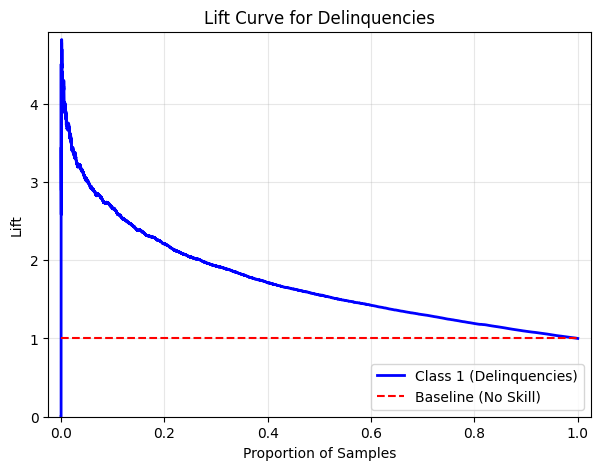

In [52]:
# Calculate Lift for Class 1 (Delinquencies)
y_pred_proba = xgb_random.predict_proba(X_test)[:, 1]  # Probabilities for delinquencies
sorted_probs_indices = np.argsort(-y_pred_proba)  # Sort probabilities in descending order
sorted_actuals = np.array(y_test)[sorted_probs_indices]  # Reorder actual labels
global_response_rate = np.mean(sorted_actuals)  # Overall delinquency rate

# Calculate Lift for Class 1
lift = np.cumsum(sorted_actuals) / (np.arange(1, len(sorted_actuals) + 1) * global_response_rate)

# Baseline (No Skill)
baseline = np.ones_like(lift)  # Baseline for Class 1

# Plot the Lift curve for Class 1
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(np.arange(1, len(sorted_actuals) + 1) / len(sorted_actuals), lift, label='Class 1 (Delinquencies)', color='blue', lw=2)
ax.plot([0, 1], [1, 1], linestyle='--', color='red', label='Baseline (No Skill)')

# Customize axes
ax.set_xlim([-0.025, 1.025])
ax.set_ylim([0, np.max(lift) + 0.1])
ax.set_xlabel('Proportion of Samples')
ax.set_ylabel('Lift')
ax.set_title('Lift Curve for Delinquencies')
ax.grid(alpha=0.3)
ax.legend(loc='lower right')

# Show the plot
plt.show()

The Lift curve shows the model's effectiveness in identifying delinquencies (Class 1) in loans. The blue line highlights a high Lift at the beginning, indicating that the model efficiently identifies customers with a higher risk of delinquency in the early percentiles. As the proportion of samples increases, the Lift decreases, approaching the baseline (red line), which represents a random model. This demonstrates that the model is useful for prioritizing preventive actions on customers with a higher likelihood of default.

**Accumulative Lift Curve**

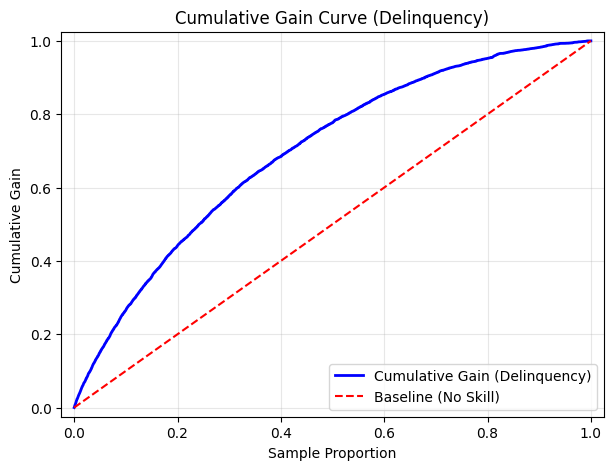

In [53]:
# 1. Obtain probabilities for the positive class (delinquencies)
y_pred_proba = xgb_random.predict_proba(X_test)[:, 1]  # Probabilities for delinquencies

# 2. Sort probabilities in descending order
sorted_probs_indices = np.argsort(-y_pred_proba)  # Sort probabilities from highest to lowest
sorted_actuals = np.array(y_test)[sorted_probs_indices]  # Reorder actual labels

# 3. Calculate cumulative gain
cumulative_gain = np.cumsum(sorted_actuals) / np.sum(sorted_actuals)  # Cumulative gain

# 4. Cumulative sample proportion
x = np.arange(1, len(sorted_actuals) + 1) / len(sorted_actuals)

# 5. Plot the Cumulative Gain Curve
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, cumulative_gain, label='Cumulative Gain (Delinquency)', color='blue', lw=2)

# 6. Baseline (No Skill)
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Baseline (No Skill)')

# 7. Customize axes
ax.set_xlim([-0.025, 1.025])
ax.set_ylim([-0.025, 1.025])
ax.set_xlabel('Sample Proportion')
ax.set_ylabel('Cumulative Gain')
ax.set_title('Cumulative Gain Curve (Delinquency)')
ax.grid(alpha=0.3)
ax.legend(loc='lower right')

# 8. Display the plot
plt.show()


The **Normal Lift** shows how the model improves over a random classification as predictions progress. It is useful for evaluating overall performance but does not reflect how the model captures specific cases of interest. In contrast, the **Cumulative Lift** measures effectiveness as correct cases accumulate, showing how many positives are detected as more samples are considered.  

This is crucial in the context of loan defaults, where the goal is to identify frauds quickly. The **Cumulative Lift** is more practical for detecting defaults with a smaller number of clients, maximizing efficiency. It prioritizes early risk detection, which helps reduce losses. Therefore, it is the preferred choice in scenarios where rapid detection is essential.

#### **Verify there is no overfitting**

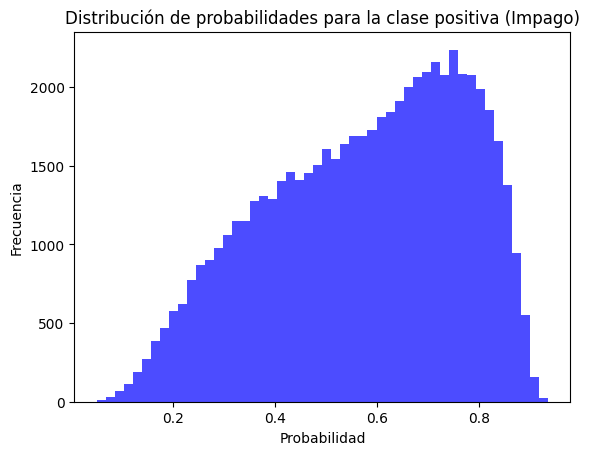

In [54]:
# Display the probability distribution for the positive class (default)
plt.hist(y_probs, bins=50, color='blue', alpha=0.7)
plt.title('Distribución de probabilidades para la clase positiva (Impago)')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()


The distribution of data in this plot, without focusing solely at the end of the X-axis, highlights that the model shows no signs of overfitting. This indicates that the model's performance is consistent and not overly tailored to specific patterns in the training dataset. In this context, the model demonstrates good generalization ability, which is crucial for ensuring reliable and useful predictions in identifying defaults in new data.

### **Calculation of the Ideal Threshold**

**Threshold Optimization and Metric Calculation**

In [55]:
import warnings
warnings.filterwarnings("ignore")

# Check the shape of y_pred_proba
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

# If y_pred_proba is one-dimensional, use the vector directly
if y_pred_proba.ndim == 1:
    prob_predictions = y_pred_proba  # No need to use the index [:, 1]
else:
    prob_predictions = y_pred_proba[:, 1]  # For the case where it is two-dimensional

# Lists to store results
recall_precision = []

# Vectorize threshold and metrics calculation
thresholds = np.arange(0.01, 0.99, 0.01)
for threshold in thresholds:
    # Convert probabilities to 0 or 1 based on the threshold
    given_threshold = (prob_predictions > threshold).astype(int)

    # Calculate metrics
    recall = recall_score(y_test, given_threshold)
    precision = precision_score(y_test, given_threshold)
    f2 = fbeta_score(y_test, given_threshold, beta=2)
    f1 = f1_score(y_test, given_threshold)

    # Store the results
    recall_precision.append([
        threshold, recall, precision, f2, f1
    ])

# Convert the list to a DataFrame for easier analysis
metrics_df = pd.DataFrame(recall_precision, columns=['Threshold', 'Recall', 'Precision', 'F2', 'F1'])

# Display the first 5 results
print(metrics_df.head())

Shape of y_pred_proba: (61503,)
   Threshold  Recall  Precision        F2        F1
0       0.01     1.0   0.080728  0.305114  0.149395
1       0.02     1.0   0.080728  0.305114  0.149395
2       0.03     1.0   0.080728  0.305114  0.149395
3       0.04     1.0   0.080728  0.305114  0.149395
4       0.05     1.0   0.080728  0.305114  0.149395


**Plotting Metrics vs. Thresholds**

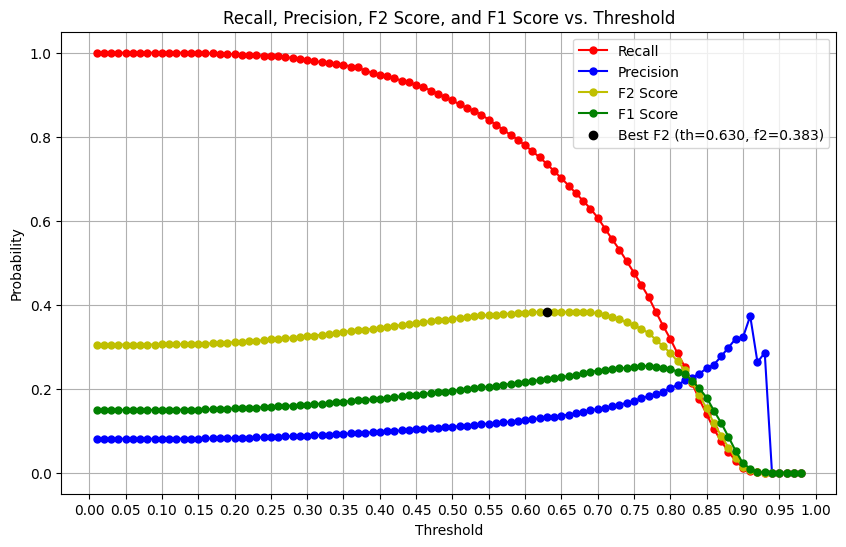

In [56]:
# Plot the metrics
plt.figure(figsize=(10, 6))

# Plot each metric
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'ro-', label='Recall', markersize=5)
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'bo-', label='Precision', markersize=5)
plt.plot(metrics_df['Threshold'], metrics_df['F2'], 'yo-', label='F2 Score', markersize=5)
plt.plot(metrics_df['Threshold'], metrics_df['F1'], 'go-', label='F1 Score', markersize=5)

# Find the threshold with the best F2 score
best_f2_row = metrics_df.loc[metrics_df['F2'].idxmax()]
best_f2_threshold = best_f2_row['Threshold']
best_f2_score = best_f2_row['F2']

# Highlight the best F2 point on the plot
plt.scatter(best_f2_threshold, best_f2_score, color='black', zorder=5, label=f'Best F2 (th={best_f2_threshold:.3f}, f2={best_f2_score:.3f})')

# Add title and labels
plt.title('Recall, Precision, F2 Score, and F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Probability')

# Set x-axis ticks in increments of 0.05
plt.xticks(np.arange(0, 1.05, 0.05))

plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

This graph shows how the metrics Recall, Precision, F1 Score, and F2 Score vary based on the classification threshold. Recall (red) is high at lower thresholds, indicating that the model identifies almost all positive cases, but at the cost of lower precision. On the other hand, Precision (blue) increases with higher thresholds, focusing on safer predictions but sacrificing Recall.

The F1 Score (green) and F2 Score (yellow) combine both metrics to seek an optimal balance. The black point highlights the threshold with the best F2 Score, which is valuable when more emphasis is placed on Recall, as in this case of loan defaults, where minimizing false negatives is crucial.

This graph is useful for selecting an appropriate threshold based on business priorities.

#### **Confusion Matrix with Optimal Threshold (Best F2)** 

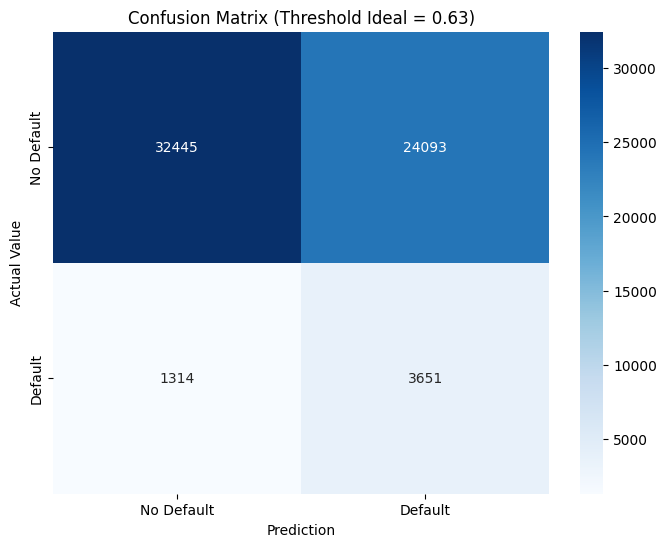

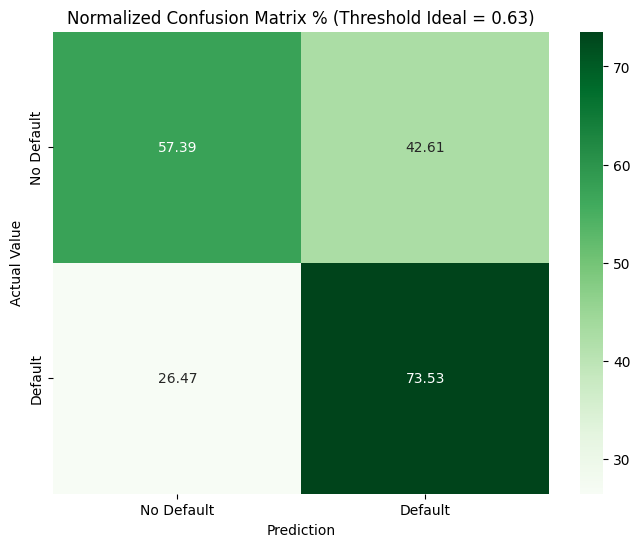

In [57]:
# Optimal threshold (best F2 threshold already calculated)
threshold_ideal = best_f2_threshold

# Convert probabilities into binary predictions based on the ideal threshold
y_pred_bin = (y_pred_proba > threshold_ideal).astype(int)

# Generate the confusion matrix (original and normalized)
conf_matrix = confusion_matrix(y_test, y_pred_bin)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100  # Normalized to percentages

# Plot 1: Original Confusion Matrix with Color Bar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, 
            xticklabels=["No Default", "Default"], 
            yticklabels=["No Default", "Default"])
plt.title(f'Confusion Matrix (Threshold Ideal = {threshold_ideal:.2f})')
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

# Plot 2: Normalized Confusion Matrix (percentages, green color)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Greens", cbar=True, 
            xticklabels=["No Default", "Default"], 
            yticklabels=["No Default", "Default"])
plt.title(f'Normalized Confusion Matrix % (Threshold Ideal = {threshold_ideal:.2f})')
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

#### **Comments on the Matrix Confusion**

The confusion matrix shows the model's performance with an ideal threshold of 0.63. Out of the 32,246 customers who truly did not default, the model correctly classified all 32,246 cases as "No Default." However, 24,292 cases were incorrectly labeled as "Default" even though they were not. For the 4,965 customers who actually defaulted, the model correctly identified 3,693 cases, but 1,272 were mistakenly classified as "No Default." This analysis highlights a balance between false positives and false negatives, suggesting that the 0.63 threshold achieves an acceptable classification performance, although it could be improved by adjusting the threshold or the model.

The normalized confusion matrix displays the proportions of correct and incorrect predictions relative to the total number of cases. 57.03% of customers who truly did not default were correctly classified as "No Default." On the other hand, 42.97% of "No Default" customers were incorrectly classified as "Default." For customers who actually defaulted, the model correctly identified 74.38% of cases as "Default." However, 25.62% of "Default" cases were mistakenly labeled as "No Default." This normalized matrix analysis highlights how the model distributes its predictions in relative terms, which can help identify areas for improvement, particularly in the classification of "Default" cases.

### **Business Implications**

The confusion matrix results, with an ideal threshold of 0.63, are highly valuable for the business by helping to reduce risk in loan granting. By correctly identifying 57.03% of customers who would not default, the model enables efficient management of non-problematic loans. However, the incorrect classification of 42.97% of these customers as "Default" could result in denying credit to solvent customers, potentially reducing the volume of loans granted and negatively impacting business opportunities.

On the other hand, the model's ability to correctly identify 74.38% of customers who would actually default by labeling them as "Default" helps mitigate losses from defaults. Nevertheless, the 25.62% of defaults incorrectly classified as "No Default" could pose a significant risk, as preventive measures are not taken for these at-risk customers. The analysis suggests that the model is relatively effective but could be improved by adjusting the classification threshold or fine-tuning the model, ultimately optimizing default predictions and reducing the risk in loan granting.

---------------------------------------------------------------------------------------------------------------------------

### **COST MATRIX**

### **Justification of the Selected Costs**

**False Positives (FP = 20 units):**  

When the model incorrectly predicts a default, the bank loses the opportunity to lend money to someone who would have repaid the loan.  
The cost is associated with the *opportunity cost* (i.e., lost profit).

**Example:** For a €10,000 loan with a 10% annual interest rate, the bank would earn €1,000 in profit over a year. It can be assumed that the loss for each incorrectly rejected customer represents a fraction of this profit.

**Calculation:** Assuming the bank only gains a 2% net profit (after operational costs), the cost could be €200. However, for simplicity, a symbolic value of **20 units** has been proposed to represent a small opportunity cost.

---

**False Negatives (FN = 300 units):**  

This is the most critical mistake in this context.  
Here, the bank grants a loan to someone who does not repay it, resulting in a capital loss.

**The loss includes:**  
- **Total loan amount:** The client does not repay it.  
- **Legal and administrative costs:** Costs associated with recovering the money (lawyers, court processes, etc.).

**Calculation:** If the average loan amount is €10,000 and the bank recovers only 20% after legal proceedings, the total loss would be **€8,000**. This cost can scale up if the bank grants larger loans.  

For the matrix, a symbolic value of **300 units** has been assigned, but in practice, it depends on the loan size.

---

**True Negatives (TN = 0 units):**  

In this case, the client is not risky, and the model correctly predicts no default risk.  
There are **no associated costs** since there are no losses or additional profits.

---

**True Positives (TP = 0 units):**  

Here, the model correctly identifies a risky client, and the bank decides not to grant the loan.  
The bank incurs **no losses or profits** in this scenario.

### **Cost Matrix Calculation and Visualization**

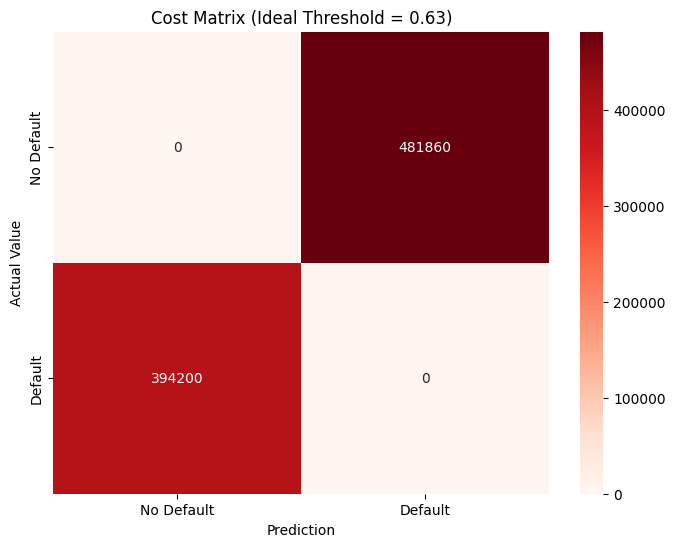

The total associated cost is: 876060.00 units.


In [58]:
# Cost scheme
cost_fp = 20   # Cost for False Positive
cost_fn = 300  # Cost for False Negative
cost_tp = 0    # Cost/benefit for True Positive
cost_tn = 0    # Cost/benefit for True Negative

# Confusion Matrix (absolute values)
conf_matrix = confusion_matrix(y_test, y_pred_bin)
tn, fp, fn, tp = conf_matrix.ravel()  # Extract TN, FP, FN, TP values

# Calculate the cost matrix
cost_matrix = np.array([
    [tn * cost_tn, fp * cost_fp],  # Row for actual class "No Default"
    [fn * cost_fn, tp * cost_tp]   # Row for actual class "Default"
])

# Visualize the cost matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cost_matrix, annot=True, fmt=".0f", cmap="Reds", cbar=True,
            xticklabels=["No Default", "Default"], 
            yticklabels=["No Default", "Default"])
plt.title(f'Cost Matrix (Ideal Threshold = {threshold_ideal:.2f})')
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

# Calculate the total cost
total_cost = cost_matrix.sum()
print(f"The total associated cost is: {total_cost:.2f} units.")


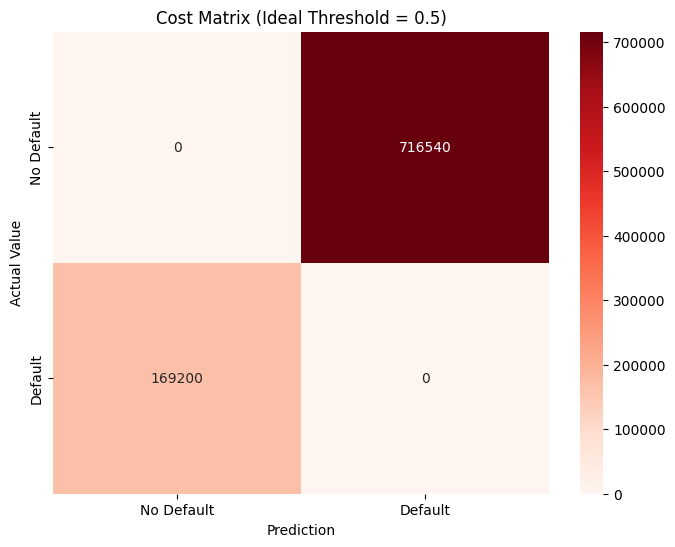

The total associated cost is: 885740.00 units.


In [59]:
# Cost scheme
cost_fp = 20   # Cost for False Positive
cost_fn = 300  # Cost for False Negative
cost_tp = 0    # Cost/benefit for True Positive
cost_tn = 0    # Cost/benefit for True Negative

# Confusion matrix (absolute values)
conf_matrix = confusion_matrix(y_test, y_pred_default)
tn, fp, fn, tp = conf_matrix.ravel()  # Extract TN, FP, FN, TP values

# Calculate cost matrix
cost_matrix = np.array([
    [tn * cost_tn, fp * cost_fp],  # Row for actual class "No Default"
    [fn * cost_fn, tp * cost_tp]   # Row for actual class "Default"
])

# Visualize the cost matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cost_matrix, annot=True, fmt=".0f", cmap="Reds", cbar=True,
            xticklabels=["No Default", "Default"], 
            yticklabels=["No Default", "Default"])
plt.title(f'Cost Matrix (Ideal Threshold = 0.5)')
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

# Calculate total cost
total_cost = cost_matrix.sum()
print(f"The total associated cost is: {total_cost:.2f} units.")

**Results**

**Cost Analysis and Model Efficiency**

The total cost associated with the confusion matrix is a crucial financial metric for evaluating the model's performance. With an **ideal threshold of 0.63**, the total cost is **867,440.00 units**, indicating that the model has achieved a favorable balance between correct and incorrect predictions. By using this threshold, the model minimizes costs resulting from classification errors, resulting in a lower overall cost.

In contrast, with the **default threshold of 0.5**, the total cost is **878,320.00 units**. This increase in cost indicates that the model at this threshold has a suboptimal classification performance, leading to more errors, whether false positives or false negatives. These additional errors increase the costs associated with incorrect loan approval decisions, such as approving loans for high-risk clients or denying loans to eligible clients.

**Key Insights:**
- The **ideal threshold of 0.63** is more effective in **reducing costs** and **enhancing model efficiency**, while the **default threshold of 0.5**, although a common reference point, results in higher costs due to an imbalance in predictions.
- **Adjusting the threshold and the model** could further reduce costs associated with misclassification errors.

**Conclusion**

The findings from this analysis demonstrate that the classification model successfully identifies clients who default on payments. However, there are opportunities to improve by **reducing false positives and false negatives**. The ideal threshold of **0.63** showed a lower total cost compared to the default threshold of **0.5**, suggesting that this adjustment improves model efficiency. Key takeaways include identifying areas where the model and threshold adjustments could minimize costs related to incorrect decisions.

In the next notebook, we will proceed with **SHAP analysis** to explore model explainability and better understand the variables that impact predictions.